## Credit Scoring and Ensemble Learning

In [34]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
df = pd.read_csv("CreditScoring.csv")
df.T

,0,1,2,3,4,5,6,7,8,9,...,4445,4446,4447,4448,4449,4450,4451,4452,4453,4454
Status,1,1,2,1,1,1,1,1,1,2,...,2,1,1,1,2,2,1,2,1,1
Seniority,9,17,10,0,0,1,29,9,0,0,...,6,23,6,3,1,1,22,0,0,5
Home,1,1,2,1,1,2,2,5,2,5,...,5,2,2,2,6,1,2,2,1,2
Time,60,60,36,60,36,60,60,12,60,48,...,60,60,48,60,48,60,60,24,48,60
Age,30,58,46,24,26,36,44,27,32,41,...,22,50,52,49,30,39,46,37,23,32
Marital,2,3,2,1,1,2,2,1,2,2,...,1,2,2,2,2,2,2,2,1,2
Records,1,1,2,1,1,1,1,1,1,1,...,2,2,1,1,2,1,1,1,1,1
Job,3,1,3,1,1,1,1,1,3,2,...,1,3,1,1,2,1,1,2,3,3
Expenses,73,48,90,63,46,75,75,35,90,90,...,35,90,45,35,75,69,60,60,49,60
Income,129,131,200,182,107,214,125,80,107,80,...,100,69,190,160,77,92,75,90,140,140


In [36]:
df.columns = df.columns.str.lower()
df.T

,0,1,2,3,4,5,6,7,8,9,...,4445,4446,4447,4448,4449,4450,4451,4452,4453,4454
status,1,1,2,1,1,1,1,1,1,2,...,2,1,1,1,2,2,1,2,1,1
seniority,9,17,10,0,0,1,29,9,0,0,...,6,23,6,3,1,1,22,0,0,5
home,1,1,2,1,1,2,2,5,2,5,...,5,2,2,2,6,1,2,2,1,2
time,60,60,36,60,36,60,60,12,60,48,...,60,60,48,60,48,60,60,24,48,60
age,30,58,46,24,26,36,44,27,32,41,...,22,50,52,49,30,39,46,37,23,32
marital,2,3,2,1,1,2,2,1,2,2,...,1,2,2,2,2,2,2,2,1,2
records,1,1,2,1,1,1,1,1,1,1,...,2,2,1,1,2,1,1,1,1,1
job,3,1,3,1,1,1,1,1,3,2,...,1,3,1,1,2,1,1,2,3,3
expenses,73,48,90,63,46,75,75,35,90,90,...,35,90,45,35,75,69,60,60,49,60
income,129,131,200,182,107,214,125,80,107,80,...,100,69,190,160,77,92,75,90,140,140


In [37]:
df.isnull().sum()

status       0
seniority    0
home         0
time         0
age          0
marital      0
records      0
job          0
expenses     0
income       0
assets       0
debt         0
amount       0
price        0
dtype: int64

In [38]:
df.describe()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
count,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4.455000e+03,4.455000e+03,4.455000e+03,4455.000000,4455.000000
mean,1.281257,7.987205,2.657015,46.441751,37.077666,1.879012,1.173513,1.675870,55.568799,7.633170e+05,1.060341e+06,4.043820e+05,1039.021773,1462.875645
std,0.450162,8.173444,1.610467,14.655225,10.984856,0.643748,0.378733,0.954035,19.515878,8.703625e+06,1.021757e+07,6.344253e+06,474.543007,628.089913
min,0.000000,0.000000,0.000000,6.000000,18.000000,0.000000,1.000000,0.000000,35.000000,0.000000e+00,0.000000e+00,0.000000e+00,100.000000,105.000000
25%,1.000000,2.000000,2.000000,36.000000,28.000000,2.000000,1.000000,1.000000,35.000000,8.000000e+01,0.000000e+00,0.000000e+00,700.000000,1117.500000
50%,1.000000,5.000000,2.000000,48.000000,36.000000,2.000000,1.000000,1.000000,51.000000,1.200000e+02,3.500000e+03,0.000000e+00,1000.000000,1400.000000
75%,2.000000,12.000000,4.000000,60.000000,45.000000,2.000000,1.000000,3.000000,72.000000,1.660000e+02,6.000000e+03,0.000000e+00,1300.000000,1692.000000
max,2.000000,48.000000,6.000000,72.000000,68.000000,5.000000,2.000000,4.000000,180.000000,1.000000e+08,1.000000e+08,1.000000e+08,5000.000000,11140.000000


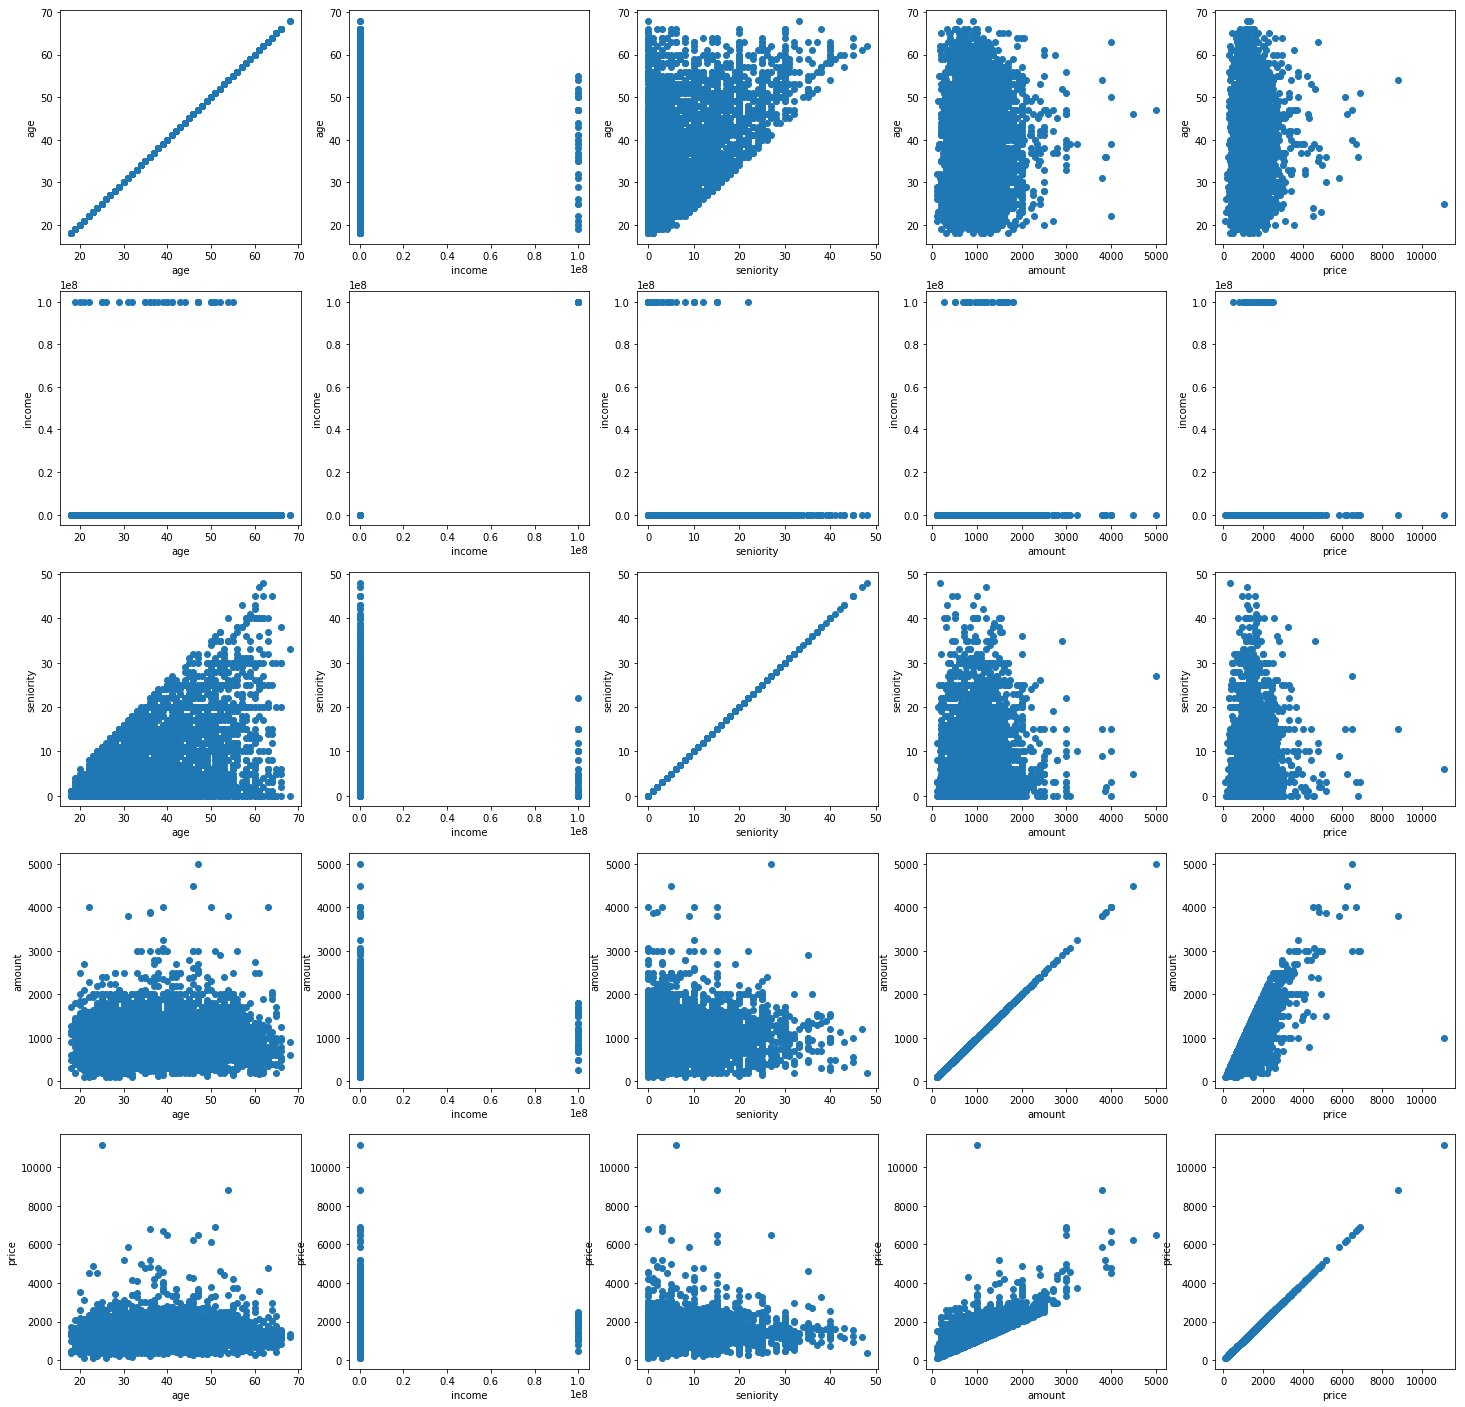

In [39]:
list_ = ["age","income","seniority","amount","price"]

fig, axs = plt.subplots(5, 5, figsize=(25,25))

for enumerate_a, a in enumerate(list_):
    for enumerate_b, b in enumerate(list_):
        axs[enumerate_a, enumerate_b].scatter(df[b], df[a])
        axs[enumerate_a, enumerate_b].set_ylabel(a)
        axs[enumerate_a, enumerate_b].set_xlabel(b)

In [40]:
df['status'].value_counts()

1    3200
2    1254
0       1
Name: status, dtype: int64

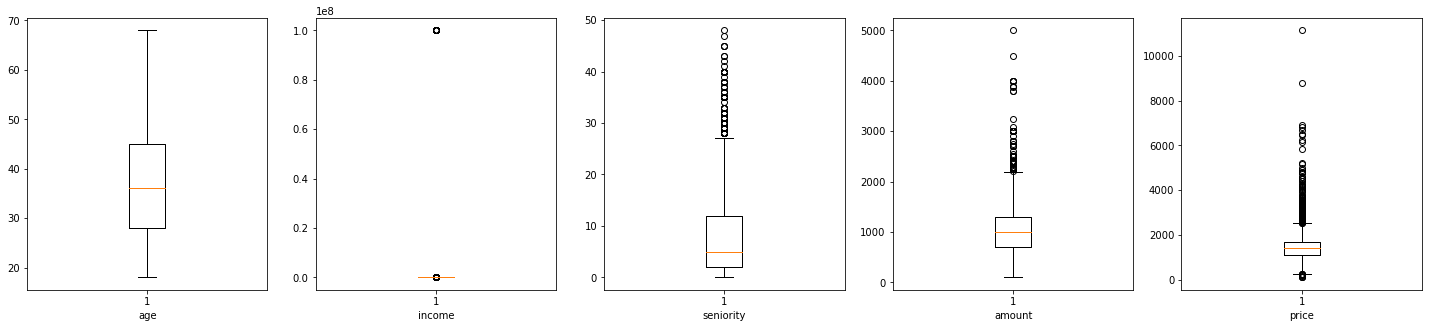

In [41]:
list_ = ["age","income","seniority","amount","price"]

fig, axs = plt.subplots(1, 5, figsize=(25,5))

for enumerate_a, a in enumerate(list_):
    axs[enumerate_a].boxplot(df[a])
    axs[enumerate_a].set_xlabel(a)

### Converting numerical to categorical values

In [42]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)

home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [43]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


### Replacing the outlier with NaN values

In [44]:
df.income = df.income.replace(to_replace=99999999, value=np.nan)
df.assets = df.assets.replace(to_replace=99999999, value=np.nan)
df.debt = df.debt.replace(to_replace=99999999, value=np.nan)

In [45]:
df.describe()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.000000,4455.000000,4455.000000,4455.000000,4421.000000,4408.000000,4437.000000,4455.000000,4455.000000
mean,7.987205,46.441751,37.077666,55.568799,130.568197,5403.433984,342.948614,1039.021773,1462.875645
std,8.173444,14.655225,10.984856,19.515878,86.367434,11573.161523,1245.861736,474.543007,628.089913
min,0.000000,6.000000,18.000000,35.000000,0.000000,0.000000,0.000000,100.000000,105.000000
25%,2.000000,36.000000,28.000000,35.000000,80.000000,0.000000,0.000000,700.000000,1117.500000
50%,5.000000,48.000000,36.000000,51.000000,120.000000,3000.000000,0.000000,1000.000000,1400.000000
75%,12.000000,60.000000,45.000000,72.000000,165.000000,6000.000000,0.000000,1300.000000,1692.000000
max,48.000000,72.000000,68.000000,180.000000,959.000000,300000.000000,30000.000000,5000.000000,11140.000000


In [46]:
df.status.value_counts()

ok         3200
default    1254
unk           1
Name: status, dtype: int64

In [47]:
df = df[df.status != 'unk']

In [48]:
df.status.value_counts()

ok         3200
default    1254
Name: status, dtype: int64

In [49]:
df.reset_index(drop=True)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4449,default,1,rent,60,39,married,no,fixed,69,92.0,0.0,0.0,900,1020
4450,ok,22,owner,60,46,married,no,fixed,60,75.0,3000.0,600.0,950,1263
4451,default,0,owner,24,37,married,no,partime,60,90.0,3500.0,0.0,500,963
4452,ok,0,rent,48,23,single,no,freelance,49,140.0,0.0,0.0,550,550


In [50]:
df.dtypes

status        object
seniority      int64
home          object
time           int64
age            int64
marital       object
records       object
job           object
expenses       int64
income       float64
assets       float64
debt         float64
amount         int64
price          int64
dtype: object

### Filling missing values

In [51]:
income_avg = df.income.mean()

df['income'] = df['income'].fillna(income_avg)

In [52]:
assets_avg = df.assets.mean()

df['assets'] = df['assets'].fillna(assets_avg)

debts_avg = df.debt.mean()

df['debt'] = df['debt'].fillna(debts_avg)

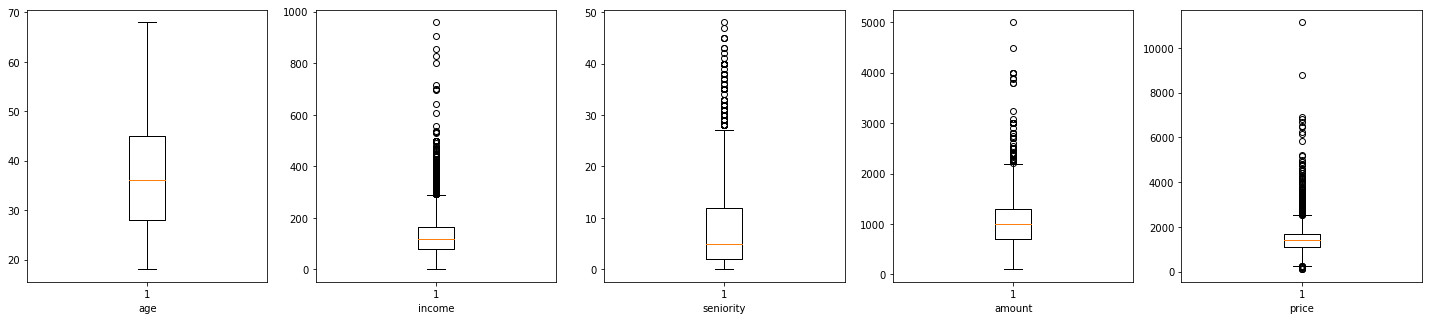

In [53]:
list_ = ["age","income","seniority","amount","price"]

fig, axs = plt.subplots(1, 5, figsize=(25,5))

for enumerate_a, a in enumerate(list_):
    axs[enumerate_a].boxplot(df[a])
    axs[enumerate_a].set_xlabel(a)

**we can see from the above boxplot, now the major outlier from income is removed**

In [54]:
from sklearn.model_selection import train_test_split

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=11)

df_train_full = df_train_full.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = (df_train.status == 'default').astype(int).values
y_val = (df_val.status == 'default').astype(int).values
y_test = (df_test.status == 'default').astype(int).values

del df_train['status']
del df_val['status']
del df_test['status']

In [55]:
df_train.shape, df_val.shape, df_test.shape

((2672, 13), (891, 13), (891, 13))

In [56]:
y_train

array([1, 1, 0, ..., 0, 0, 0])

# Decision Tree

In [57]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'

In [58]:
x = df_train.iloc[0].to_dict()

In [59]:
assess_risk(x)

'ok'

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.670179336901504

In [61]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

** above example shows Overfitting - fails to generalize the data **

In [62]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.7054989859726213
val: 0.6685264343319367


In [63]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.7727018900343643
val: 0.7376244217868301


** depth 3 gives better results **

### Let's find the best depth

depth: 1, train_auc: 0.6282660131823559, val_auc: 0.6058644740984719
depth: 2, train_auc: 0.7054989859726213, val_auc: 0.6685264343319367
depth: 3, train_auc: 0.7727018900343643, val_auc: 0.7376244217868301
depth: 4, train_auc: 0.814225254915216, val_auc: 0.7578043641471508
depth: 5, train_auc: 0.8404047659286802, val_auc: 0.7646551306580127
depth: 6, train_auc: 0.8676764689313278, val_auc: 0.7475267007338161
depth: 7, train_auc: 0.8931380626443581, val_auc: 0.7476054103799861
depth: 8, train_auc: 0.914980141963833, val_auc: 0.7316515705601705
depth: 9, train_auc: 0.939799870429835, val_auc: 0.6874591315298733


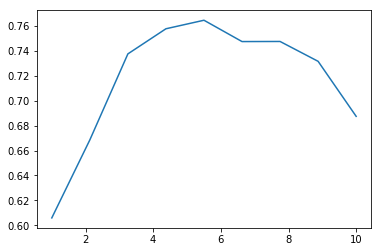

In [64]:
auc = []
x = np.linspace(1, 10, 9)

for i in range(1, 10):
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_train)[:, 1]
    train_auc = roc_auc_score(y_train, y_pred)
   
    y_pred = dt.predict_proba(X_val)[:, 1]
    val_auc = roc_auc_score(y_val, y_pred)
    auc.append(val_auc)
    
    print('depth: ' + str(i) + ', ' + 'train_auc: ' + str(train_auc) + ', val_auc: ' + str(val_auc))

plt.plot(x, auc)

** Depth 5 gives the best results on val dataset ** 

In [65]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.8404047659286802
val: 0.7646551306580127


In [66]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- seniority <= 2.50
|   |   |   |   |--- income <= 27.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- income >  27.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- seniority >  2.50
|   |   |   |   |--- expenses <= 93.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- expenses >  93.50
|   |   |   |   |   |--- class: 1
|   |   |--- income >  74.50
|   |   |   |--- seniority <= 5.50
|   |   |   |   |--- amount <= 1330.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- amount >  1330.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- seniority >  5.50
|   |   |   |   |--- income <= 114.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- income >  114.50
|   |   |   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- assets <= 8750.00
|   |   |   |--- time <= 27.00
|   |   |   |   |--- home=rent <= 0.50
|   |   |   |   |   |--- class: 0
|   | 

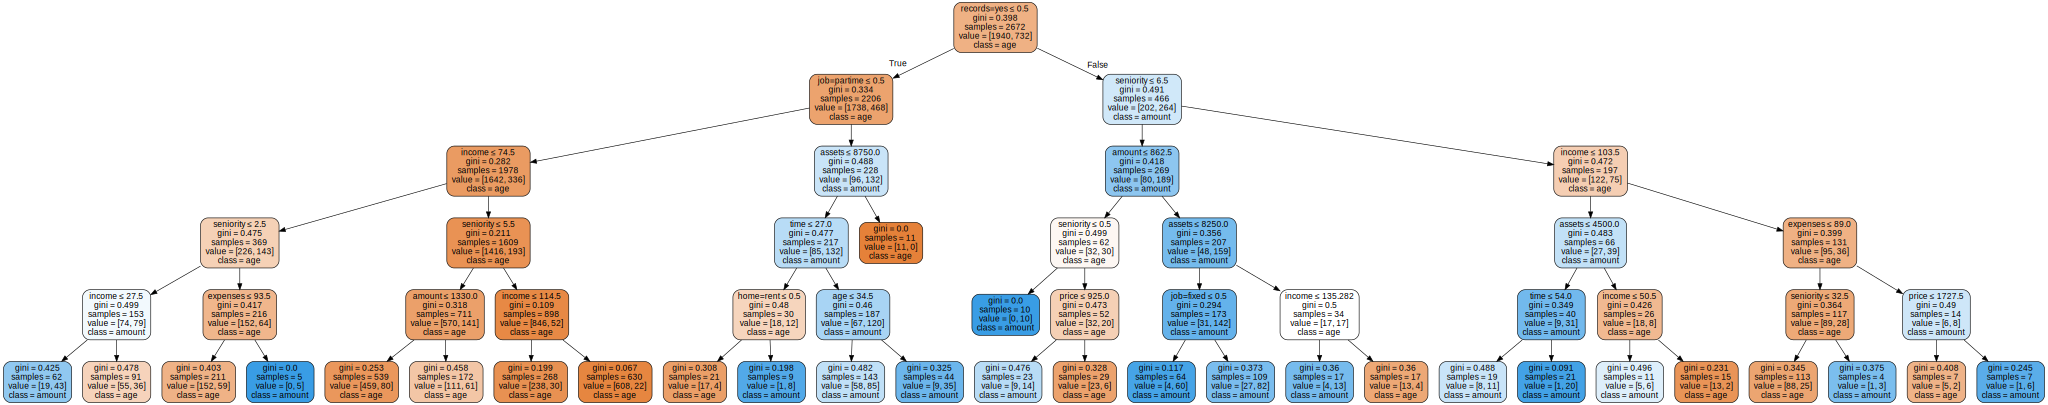

In [67]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(dt, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("creditscoring") 

dot_data = tree.export_graphviz(dt, out_file=None, 
                      feature_names=dv.get_feature_names(),  
                      class_names=dv.get_feature_names(),  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

# Decision trees parameter tuning

In [68]:
scores = []

for depth in [4, 5, 6]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [69]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,max_depth,min_samples_leaf,auc
0,4,1,0.757804
1,4,5,0.757804
2,4,10,0.757804
3,4,15,0.760505
4,4,20,0.757962
5,4,500,0.679140
6,4,100,0.751962
7,4,200,0.745405
8,5,1,0.764655
9,5,5,0.764819


In [70]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns='max_depth', values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.758  0.765  0.756
5                 0.758  0.765  0.753
10                0.758  0.761  0.764
15                0.761  0.762  0.774
20                0.758  0.760  0.763
100               0.752  0.768  0.776
200               0.745  0.757  0.766
500               0.679  0.679  0.679

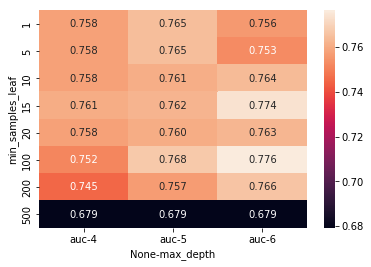

In [71]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

### Best parameters for Decision Tree

In [72]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.8552659005126471
val: 0.7739458962001404


# Ensembles and random forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

scores = []

for n in range(10, 301, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

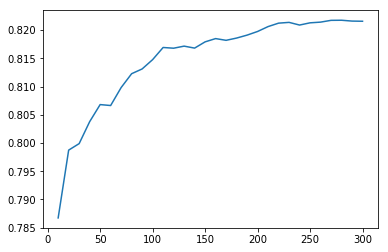

In [74]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

plt.plot(df_scores.n_estimators, df_scores.auc)

In [75]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 301, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [76]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

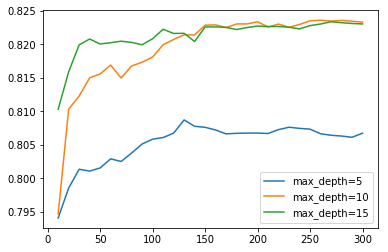

In [77]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

In [78]:
max_depth = 10
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 301, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

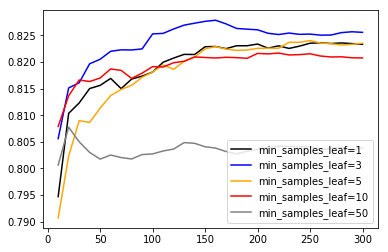

In [79]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [88]:
max_depth = 10
min_samples_leaf = 3
estimators = 300

rf = RandomForestClassifier(n_estimators=estimators,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_train)
roc_auc_score(y_train, y_pred)

0.8216579347642387

In [89]:
y_pred = rf.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

0.9572002985747282

In [81]:
from sklearn.model_selection import GridSearchCV

parameters = {
     'max_depth': [5, 10, 15],
     'min_samples_leaf': [1, 3, 5, 10],
     'n_estimators': [100, 200, 300]}

trial_RF = RandomForestClassifier(random_state=1)

gscv = GridSearchCV(trial_RF,parameters,scoring='roc_auc',cv=10)
trial_RF_cv = gscv.fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ",trial_RF_cv.best_params_)
print("roc_auc best score:", trial_RF_cv.best_score_)
print("roc_auc_score prob score: ", gscv.score(X_train, y_train))
print("roc_auc_score score: ", roc_auc_score(y_train, trial_RF_cv.predict(X_train)))

tuned hpyerparameters :(best parameters)  {'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 200}
roc_auc best score: 0.8437722569342399
roc_auc_score prob score:  0.9396090361106416
roc_auc_score score:  0.7886654272998705


### Best parameters for Random Forest

In [90]:
max_depth = 10
min_samples_leaf = 3
estimators = 300

rf = RandomForestClassifier(n_estimators=estimators,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)

rf

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=300,
                       random_state=1)

# Gradient boosting and XGBoost

In [83]:
import sys
!{sys.executable} -m pip install xgboost

You should consider upgrading via the 'C:\Users\Rajit_Sanghvi\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [84]:
import xgboost as xgb

In [91]:
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [114]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 4,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=20)

[14:04:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [115]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8191464241602286

In [116]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [119]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 4,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [121]:
s = output.stdout
print(s)

[0]	train-auc:0.85913	val-auc:0.76577
[5]	train-auc:0.93069	val-auc:0.80010
[10]	train-auc:0.95204	val-auc:0.80969
[15]	train-auc:0.96841	val-auc:0.81113
[20]	train-auc:0.97812	val-auc:0.81952
[25]	train-auc:0.98666	val-auc:0.81784
[30]	train-auc:0.99137	val-auc:0.81473
[35]	train-auc:0.99350	val-auc:0.81724
[40]	train-auc:0.99558	val-auc:0.81895
[45]	train-auc:0.99623	val-auc:0.81648
[50]	train-auc:0.99715	val-auc:0.81551
[55]	train-auc:0.99795	val-auc:0.81609
[60]	train-auc:0.99899	val-auc:0.81760
[65]	train-auc:0.99929	val-auc:0.81493
[70]	train-auc:0.99959	val-auc:0.81374
[75]	train-auc:0.99982	val-auc:0.81272
[80]	train-auc:0.99984	val-auc:0.81451
[85]	train-auc:0.99992	val-auc:0.81315
[90]	train-auc:0.99996	val-auc:0.81232
[95]	train-auc:0.99999	val-auc:0.81199
[100]	train-auc:1.00000	val-auc:0.81160
[105]	train-auc:1.00000	val-auc:0.81312
[110]	train-auc:1.00000	val-auc:0.81306
[115]	train-auc:1.00000	val-auc:0.81431
[120]	train-auc:1.00000	val-auc:0.81351
[125]	train-auc:1.0000

In [136]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [138]:
df_score = parse_xgb_output(output)
df_score

,num_iter,train_auc,val_auc
0,0,0.85913,0.76577
1,5,0.93069,0.80010
2,10,0.95204,0.80969
3,15,0.96841,0.81113
4,20,0.97812,0.81952
5,25,0.98666,0.81784
6,30,0.99137,0.81473
7,35,0.99350,0.81724
8,40,0.99558,0.81895
9,45,0.99623,0.81648


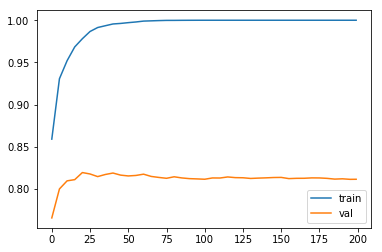

In [139]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

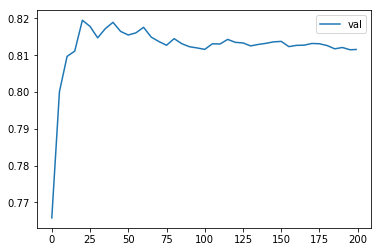

In [140]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

# XGBoost parameter tuning

### Eta tuning

In [141]:
scores = {}

In [154]:
%%capture output

xgb_params = {
    'eta': 1.0, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 4,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [155]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=1.0'

In [156]:
scores.keys()

dict_keys(['eta=0.01', 'eta=0.05', 'eta=0.1', 'eta=0.3', 'eta=1.0'])

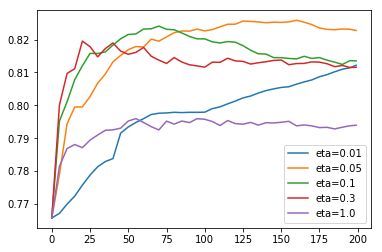

In [157]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=key)

plt.legend()

### max_depth tuning

In [158]:
scores = {}

In [165]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 4,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [166]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=6'

In [167]:
scores.keys()

dict_keys(['max_depth=3', 'max_depth=4', 'max_depth=6'])

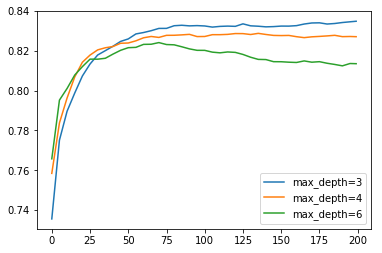

In [169]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

plt.legend()

### min_child_weight tuning

In [170]:
scores = {}

In [177]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 4,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [178]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=30'

In [179]:
scores.keys()

dict_keys(['min_child_weight=1', 'min_child_weight=10', 'min_child_weight=30'])

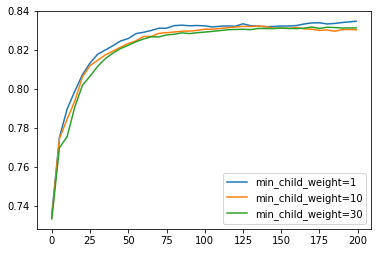

In [180]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)

plt.legend()

### Best parameters for xgboost

In [191]:
import sys
!{sys.executable} -m pip install xgboost

import xgboost as xgb

xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 4,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200)
model 

You should consider upgrading via the 'C:\Users\Rajit_Sanghvi\Anaconda3\python.exe -m pip install --upgrade pip' command.


# Selecting the final model

In [197]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_train)
auc = roc_auc_score(y_train, y_pred)
print('train auc: ', auc)

y_pred = dt.predict(X_val)
auc = roc_auc_score(y_val, y_pred)
print('val auc: ', auc)

train auc:  0.7649428201228099
val auc:  0.6786769513937663


In [198]:
max_depth = 10
min_samples_leaf = 3
estimators = 300

rf = RandomForestClassifier(n_estimators=estimators,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_train)
auc = roc_auc_score(y_train, y_pred)
print('train auc: ', auc)

y_pred = rf.predict(X_val)
auc = roc_auc_score(y_val, y_pred)
print('val auc: ', auc)

train auc:  0.8216579347642387
val auc:  0.6690077740912064


In [199]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 4,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200)

y_pred = model.predict(dtrain)
auc = roc_auc_score(y_train, y_pred)
print('train auc: ', auc)

y_pred = model.predict(dval)
auc = roc_auc_score(y_val, y_pred)
print('val auc: ', auc)

train auc:  0.9416645541096276
val auc:  0.8348035891598655


### Xgboost is the best model

In [201]:
df_train_full = df_train_full.reset_index(drop=True)

y_train_full = (df_train_full.status == 'default').astype(int).values
del df_train_full['status']

In [202]:
dicts_train_full = df_train_full.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train_full = dv.fit_transform(dicts_train_full)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [203]:
dfulltrain = xgb.DMatrix(X_train_full, label=y_train_full,
                    feature_names=dv.get_feature_names())

dtest = xgb.DMatrix(X_test, feature_names=dv.get_feature_names())

In [204]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 4,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=200)

y_pred = model.predict(dtest)
auc = roc_auc_score(y_test, y_pred)
print('val auc: ', auc)

val auc:  0.82641366502126
